# Inflation Curves Fundamentals

This notebook demonstrates how to access and use the functionalities of **Inflation Curves** within the **LSEG Financial Analytics SDK**. 

Inflation curves provide forward Consumer Price Index data used for pricing inflation indexed instruments.

**You will be able to:**
- Configure and request inflation curve data

## Imports

Import the following necessary modules:

- `lseg_analytics.pricing.market_data.inflation_curves` - To access inflation curves data

This notebook uses external libraries **pandas, matplotlib**; please ensure they are installed in your Python environment (e.g. 'pip install pandas') before running the code.

In [1]:
from lseg_analytics.pricing.market_data import inflation_curves as infc

import datetime as dt
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## Data Preparation

Inflation curve preparation follows a structured 3-step process:

**Process Overview:**
1. **Curve Definition** - Specify the underlying (Inflation Index)
2. **Curve Parameters** - Configure calculation settings, optional
3. **Request Creation** - Combine definition and parameters into a request object  

Each step builds upon the previous, creating a complete request specification for the curve engine.

In [2]:
print("Step 1: Creating Curve Definition...")
# Select an Inflation Index
inflation_index = 'AGBRPI'

# Create curve definition object
curve_definition = infc.InflationCurveDefinitionItem(
        inflation_index = infc.InflationIndex(code=inflation_index) 
        )
print(f"   ✓ Instrument: {curve_definition.inflation_index}")

print("Step 2: Configuring Curve Parameters...")
# Create curve parameters object - optional
curve_parameters = infc.InflationCurveParameters(
        valuation_date_time = dt.datetime.strptime("2025-01-18", "%Y-%m-%d")   
    )
print(f"   ✓ Curve Parameters: {curve_parameters}")


print("Step 3: Create request item...")
# Create the main request object with basic configuration
request_item = infc.InflationCurvesRequestItem(
        curve_tag = f"{inflation_index}_InflationCurve",
        curve_definition = curve_definition,
        curve_parameters = curve_parameters,
    )
print(f"   ✓ Request Item: {json.dumps(request_item.as_dict(), indent=4)}")

Step 1: Creating Curve Definition...
   ✓ Instrument: {'code': 'AGBRPI'}
Step 2: Configuring Curve Parameters...
   ✓ Curve Parameters: {'valuationDateTime': '2025-01-18T00:00:00Z'}
Step 3: Create request item...
   ✓ Request Item: {
    "curveTag": "AGBRPI_InflationCurve",
    "curveDefinition": {
        "inflationIndex": {
            "code": "AGBRPI"
        }
    },
    "curveParameters": {
        "valuationDateTime": "2025-01-18T00:00:00Z"
    }
}


## Request Execution

In [3]:
# Execute the calculation using the calculate function
# The 'universe' parameter accepts a list of request items for batch processing
response = infc.calculate(universe=[request_item])
curve_data = response['data'][0]

## Results Display

#### Key Sections in the `curve_data` JSON

 - **curveDefinition**: Curve data defining the Inflation curve (e.g., id, country, currency, inflation index, name, source), it's InflationCurveDefinitionItem that we used plus additional information. 

 - **curveParameters**: data to parametrize the curve (e.g. Valuation date, price side, interpolation mode, seasonality).

 - **curves**:
   - **consumerPriceIndexCurvePoints**
   - **inflationRateCurvePoints**
   - **seasonalityCurvePoints**

In [4]:
cpis = curve_data['curves']['consumerPriceIndexCurvePoints']
cpis_df = pd.DataFrame(cpis)
cpis_df["Month/Year"] = cpis_df['month'] + ' ' + cpis_df['year'].astype(str)
del cpis_df['month'],cpis_df['year']
cpis_df.set_index("Month/Year", inplace = True)
cpis_df.head(5) # remove .head(5) to get the entire dataframe

,indexValue
Month/Year,
November 2024,390.900000
December 2024,392.100000
January 2025,391.652621
February 2025,394.156422
March 2025,396.006201


Text(0, 0.5, 'CPI Value')

<Figure size 640x480 with 0 Axes>

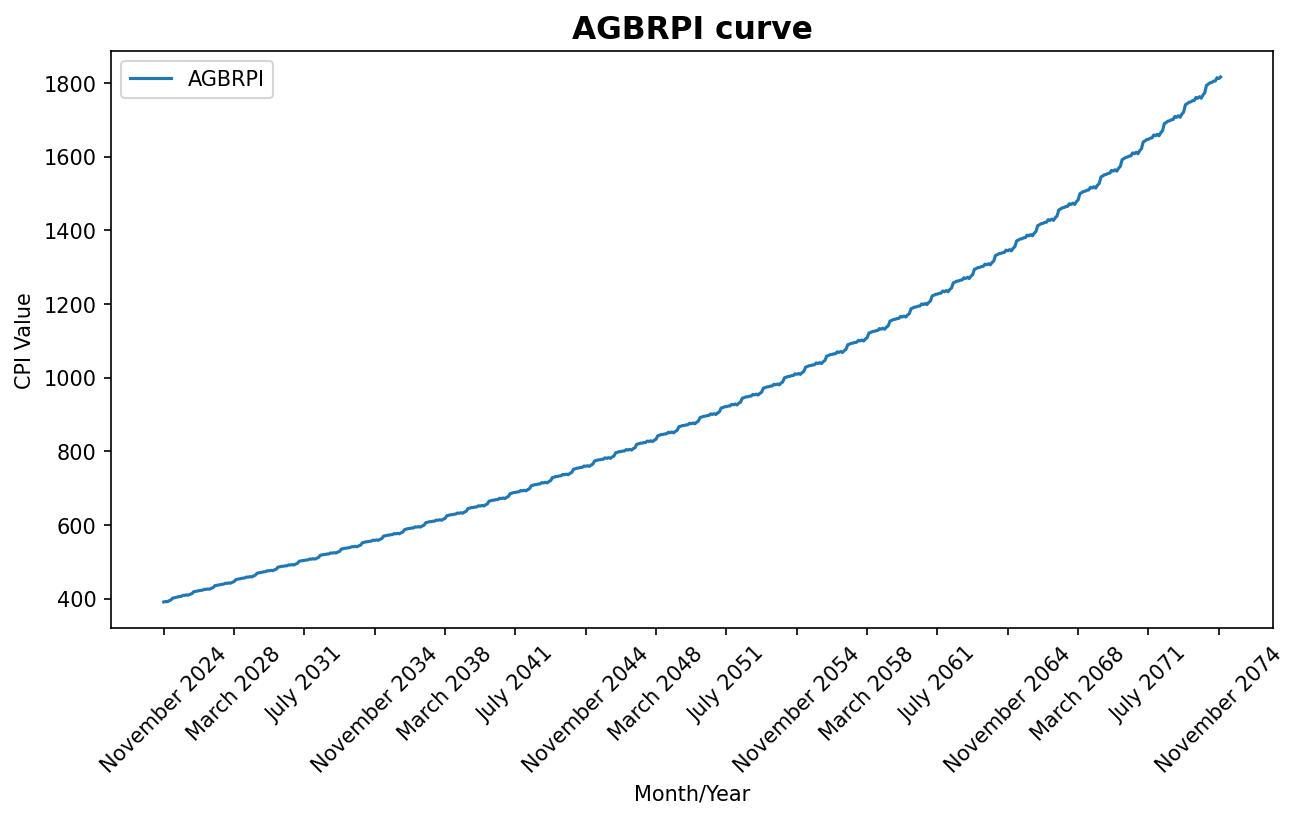

In [5]:
plt.figure()
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(cpis_df.index, cpis_df['indexValue'], label = inflation_index)
plt.title(f"{inflation_index} curve", fontdict={'fontweight':'bold','fontsize':15})
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.xlabel('Month/Year')
plt.ylabel('CPI Value')

## Appendix: Complete Function Reference

### Available Main Classes and Functions in inflation_curve Module

The following is a complete list of all classes, enums, and functions available after importing from `lseg_analytics.pricing.market_data.inflation_curve`:

**Core Classes:**
- `InflationCurveDefinitionItem` - Define underlying instrument specifications
- `InflationCurveParameters` - Configure inflation curve parameters and settings
- `InflationCurvesRequestItem` - Main request object for curve calculation

**Response Classes:**
- `InflationCurvesResponse` - Main response container
- `InflationCurvesResponseItem` - Individual curve response
- `ConsumerPriceIndexCurvePoint` - Individual CPI data point

**Main Functions:**
- `calculate()` - Execute volatility surface calculations
- `functions_all` - List all available functions